In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gabor_fn(sigma, theta, Lambda, psi, gamma):
    """
    sigma is the variance
    theta is the orientation
    lambda is the wavelength of the sinusoidal carrier
    psi = 
    """
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3 # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
#     xmax = 15
#     ymax = 15
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    plt.imshow(gb,cmap='binary')
    return gb

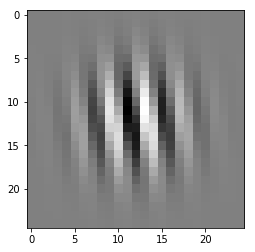

In [56]:
g = gabor_fn(4, 0.25, 1, 1.0, 1)